# Séparateurs à vaste marge

In [1]:
import breastcancerutils 
import matplotlib.pyplot as plt
import numpy as np
import time as t

____________
# 1 Données

In [2]:
x , y =  breastcancerutils.load_breastcancer('wdbcM1B0.data')

____________
# 2 Méthode du sous-gradient

## Question 2.1

Remarquons d'abord que l'expression à minimiser dans (2) et inférieur ou égale à l'expression à minimiser dans (2) de plus $\forall v,a$ fixé l'expression de (1) est plus petite ou égale à l'expression de (2) car $\zeta$ peut prendre pour valeur $max(0,1-y_i(x_i^Tv + a)$ on a donc l'égalité des valeurs de minimum de (1) et (2).

En prenant $ v_{2} $ et $ a_{2} $ minimisant (2) et $\zeta = max(0,1-y_i(x_i^Tv + a))$ la valeur minimal est atteinte, on a contrsuit une solution de (1) à partir d'une solution de (2). 

En prenant $ v $ , $ a $ et $ \zeta$ minimisant (1) on a $ \frac{1}{2}\sum^{m}_{j=1}v_{j}^{2} + c\sum^{n}_{i=1}max(0,1-y_i(x_i^Tv + a) \leq \frac{1}{2}\sum^{m}_{j=1}v_{j}^{2} + c\sum^{n}_{i=1}\zeta_{i}$ à cause des contraine de (1), or le membre de droite est égale à la valeur minimum commune à (1) et (2) d'où $v$ et  $a$ sont des solution de (2).

___________
## Question 2.2

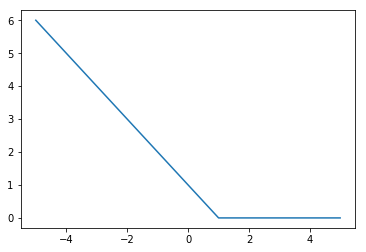

In [3]:
px = np.arange(-5,5,1/100)
h = lambda x: max(0,1-x)
py = list(map(h,px))

plt.plot(px,py)
plt.show()

aux endroit où h est dérivable on a immédiatement le résultat demandé, en 1 le sous gradient est composé de tout le coefficient des tangentes à h passant pas (0,1), c'est à dire $[-1,0]$

____________
## Question 2.3

En prenant:
$
\begin{equation}
M = 
\begin{pmatrix}
y_1  x_1^T & y_1 \\
... & ... \\
y_n  x_n^T & y_n
\end{pmatrix}
\end{equation}
$ 

$H(v) = \sum_{i=1}^{n} h_i(v_i), avec \: h_i(x) = max(0,1-x) \\$
et
$ \\ N = \sum_{i=1}^{n} n_i(v_i), avec \: n_i(x) = \frac{x^2}{2} $

On a bien la décomposition demandée. Comme les $dom$ des différentes fonction recouvre les ensembles de définitions on a bien l'agalité $  \partial f(v,a) = \partial N(v,a) + cM^T\partial H(M(v,a))$

Comme N est séparable et que chacune de ses composantes est différenciable on à :

$\begin{equation}
\partial N(x_1,...,x_{n+1} ) = {\Large\times}_{i=1}^{n+1} \{ x_i \}
\end{equation}$



$\begin{equation}
\partial H(x_1,...,x_{n+1} ) = {\Large\times}_{i=1}^{n+1} \partial h(x_i)
\end{equation}$


avec $h$ de la question précédente.

_______
## Question 2.4

In [4]:
mtemp = np.ones((x.shape[0],x.shape[1]+1))
mtemp[:,:-1] = x
M = np.diag(y).dot(mtemp)

n = lambda x : x**2/2

def H(vect):
    return np.array(list(map(h,vect)))

def N(vect):
    return np.append(np.array(list(map(n,vect[:-1]))),np.zeros(1))

def gradN(vect):
    return np.append(vect[:-1],np.zeros(1))

def gradh(x):
    if x<=1:
        return -1
    else:
        return 0
    
def gradH(vect):
    return np.array(list(map(gradh,vect)))

def function(v,a):
    vect = np.append(v,a)
    value = N(vect).sum() + H(M.dot(vect)).sum()
    grad = gradN(vect) + M.T.dot(gradH(M.dot(vect)))
    return value, grad 
    

_________
## Question 2.5

In [6]:
testv=np.ones(x.shape[1])
testa=np.ones(1)
v0 = testv-1
a0 = testa-1

stop = True
it = 0
values = []

begin_gd = t.time()
while stop:
    vect = np.append(v0,a0)
    gk = 1/(it+1)
    v_temp, grad_temp = function(v0,a0)
    values.append(v_temp)
    vect -= gk*grad_temp
    v0, a0 = vect[:-1] , vect[-1]
    if it >2000:
        stop = False
    it+=1
end_gd = t.time()

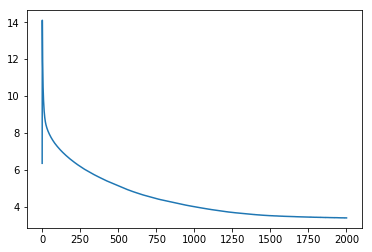

le minimum de la fonction objectif est :  29.382056954691834


In [7]:
plt.plot([i for i in range(2002)],np.log(values))
plt.show()
print('le minimum de la fonction objectif est : ',values[-1])

# 3 Méthode du sous-gradient stochastique

## Question 3.1

Le théoreme de transfer nous donne :
$
\begin{equation}
\mathbb{E}[ f_I(v,a) ] = \int f_i(v,a) dI(i)
\end{equation}
$

avec $dI = \sum_{i=1}^{n} \frac{\delta_i}{n}$

d'où : 
$
\begin{equation*}
\mathbb{E}[ f_I(v,a) ] = \sum_{i=1}^{n} f_i(v,a) = \sum_{i=1}^{n} \left(  \frac{1}{2}\sum^{m}_{j=1}v_{j}^{2} + c\times n \times max(0,1-y_i(x_i^Tv + a) \right) = f(v,a)
\end{equation*}
$

## Question 3.2

Dans l'approche stochastique seule l'expression de $H$ et de $M$ changent, on a à présent : $H(v) = h(v)$ et en notant
$
\begin{equation}
M_i = 
\begin{pmatrix}
y_i  x_i^T & y_i \\
\end{pmatrix}
\end{equation}
$ 


on a donc 

$\partial f_i(v,a) = \partial N(v,a) + cM^T\partial H(M(v,a)) = \partial N(v,a) + cM_i^T\partial h(M_i(v,a))$

## Question 3.3

In [8]:
#renvoie la valeur de la fonction objectif
def function_v(v,a):
    vect = np.append(v,a)
    value = N(vect).sum() + H(M.dot(vect)).sum()
    return value 

# renvoie le gradient par rapport à la ieme coordonnée
def function_i(v,a,i):
    vect = np.append(v,a)
    grad = gradN(vect) + M[i,:].T.dot(gradh(M[i,:].dot(vect)))
    return grad

r = lambda : np.random.randint(low = 0, high = M.shape[0]-1)

v0_sto = testv-1
a0_sto = testa-1

stop = True
it = 0

# stocke les valeurs des différentes itération pour calculer le barycentre
values_sto = []
xks = []
gks = np.array([])

begin_sto = t.time()
while stop:
    vect_sto = np.append(v0_sto,a0_sto)
    gk = 1/np.sqrt(it+1)
    gks = np.append(gks,gk)
    grad_temp = function_i(v0_sto,a0_sto,r())
    vect_sto -= gk*grad_temp
    xks.append(vect_sto)
    barycentre = (gks.dot(np.array(xks))/(gks.sum()))
    v_temp = function_v(barycentre[:-1],barycentre[-1])
    values_sto.append(v_temp)
    v0_sto, a0_sto = vect_sto[:-1] , vect_sto[-1]
    if it >2000:
        stop = False
    it+=1
end_sto = t.time()

On vérifie que graphiquement que la méthode à marché

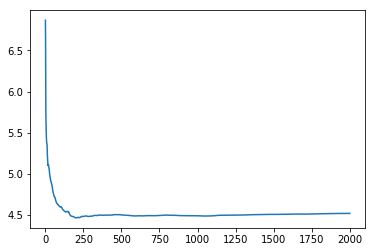

la valeur la plus faible est :  86.54649964858187


In [9]:
plt.plot([i for i in range(2002)],np.log(values_sto))
plt.show()
print('la valeur la plus faible est : ',min(values_sto))

# 4 Méthode du Lagrangien augmenté 

## Question 4.1

Soit $\phi_0 , \phi_1 \in \mathbb{R}_{+}^n$ le Lagrangien de (1) s'écrit :

$L : (v,a,\zeta,\phi_0,\phi_1) \mapsto f(v,a) + <\phi_0,-\zeta> + <\phi_1,H'M(v,a)-\zeta>$ 

avec $H'(x) = (h(x_1) , ... , h(x_n))$

## Question 4.2

la dérivée de $x \mapsto max(0,x)$ est $\mathbb{1}_{x>0}$ pour $x \neq 0$

$ \frac{\partial g}{\partial \phi} = -\frac{\phi}{\rho} + \frac{\rho}{2}\times \frac{\partial (\max(0,x + \frac{\phi}{\rho})^2)}{\partial (\max(0,x + \frac{\phi}{\rho}))} \times \frac{\partial( \max(0,x + \frac{\phi}{\rho}))}{\partial (x + \frac{\phi}{\rho})} \times \frac{\partial  (x + \frac{\phi}{\rho})}{\partial \phi} = -\frac{\phi}{\rho} + \frac{\rho}{2}\times2\max(0,x+\frac{\phi}{\rho}) \times \mathbb{1}_{x+\frac{\phi}{\rho}>0} \times \frac{1}{\rho} = -\frac{\phi}{\rho} + \max(0,x+\frac{\phi}{\rho}) = \max(-\frac{\phi}{\rho},x) $

$ \frac{\partial g}{\partial x} = \frac{\rho}{2}\times \frac{\partial (\max(0,x + \frac{\phi}{\rho})^2)}{\partial (\max(0,x + \frac{\phi}{\rho}))} \times \frac{\partial( \max(0,x + \frac{\phi}{\rho}))}{\partial (x + \frac{\phi}{\rho})} \times \frac{\partial  (x + \frac{\phi}{\rho})}{\partial x} = \frac{\rho}{2}\times 2 \max(0,x+\frac{\phi}{\rho}) \times \mathbb{1}_{x+\frac{\phi}{\rho}>0} = \rho \max(0,x+\frac{\phi}{\rho}) $

## Question 4.3

en dérivant une seconde fois on trouve :

$ \frac{d^2 g_\theta(x)}{dx^2} = \mathbb{1}_{x + \frac{\phi}{\rho} \leq 0} \geq 0$ donc $g_{theta}$ est convexe 

$\frac{d^2 g_x(\theta)}{d\theta^2} = -\frac{1}{\rho}\mathbb{1}_{-\frac{\phi}{\rho} \leq x} \leq 0$ donc $g_x$ est concave

## Question 4.4

On vérifie dans un premier temps que la déscente de gradient à ph1 et ph0 constant fonctionne.

In [10]:
e = 1 
p = 2
dy = np.diag(y)

v0 = testv-1
a0 = testa-1
z0 = np.zeros((len(y),))
ph0 = np.zeros((len(y),))
ph1 = np.zeros((len(y),))

# fonctions utiles
g    = lambda x,ph : -ph**2/2/p + p*(max(0,x+ph/p)**2)/2
ggx  = lambda x,ph : p*max(0,x+ph/p)
ggth = lambda x,ph : max(-ph/p,x)

# version vectoriser de ces fonctions
gv = np.vectorize(g)
ggxv = np.vectorize(ggx)
ggthv = np.vectorize(ggth)

# donne la valeur de la fonction lagrangein
def vallp(v,a,z,ph0,ph1):
    return (v*v).sum()/2 +z.sum() + gv(-z,ph1).sum() + gv(-z+1-dy.dot(x.dot(v)+a),ph0).sum()

#gradient du lagragien selon v,a et z
def gradlp(v,a,z):
    gradv = v.copy() - (dy.dot(x).T).dot(ggxv(-z+1-dy.dot(x.dot(v)+a),ph0))
    grada = -dy.dot(ggxv(-z+1-dy.dot(x.dot(v)+a),ph0)).sum()
    gradz = np.ones(z.shape) - ggxv(-z,ph1) - ggxv(-z+1-dy.dot(x.dot(v)+a),ph0)
    return gradv, grada, gradz

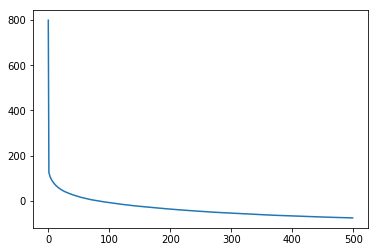

In [11]:
valp=[]
vk = []

# test de la déscente de gradient 
for i in range(500):
    gradv, grada, gradz = gradlp(v0,a0,z0)
    v0 -= gradv/(i+1000) # une constante à été rajouté pour éviter que les itérations divergent
    a0 -= grada/(i+1000)
    z0 -= gradz/(i+1000)
    valeur = vallp(v0,a0,z0,ph0,ph1)
    valp.append(valeur)

plt.plot(range(len(valp)),valp)
plt.show()

On implémente maintenant la condition sur la norme du gradient

In [12]:
def norme(tuple):
    maxco = 0
    for elt in tuple:
        maxco += np.linalg.norm(elt)
    return maxco

valp=[]
ph0 = np.zeros((len(y),))
ph1 = np.zeros((len(y),))


def gradient_find(ph0,ph1)   :
    v0 = testv-1
    a0 = testa-1
    z0 = np.zeros((len(y),))
    def gradlpinner(v,a,z):
        gradv = v.copy() - (dy.dot(x).T).dot(ggxv(-z+1-dy.dot(x.dot(v)+a),ph0))
        grada = -dy.dot(ggxv(-z+1-dy.dot(x.dot(v)+a),ph0)).sum()
        gradz = np.ones(z.shape) - ggxv(-z,ph1) - ggxv(-z+1-dy.dot(x.dot(v)+a),ph0) 
        return gradv, grada, gradz
    gradv, grada, gradz = gradlpinner(v0,a0,z0)
    norm = norme((gradv, grada, gradz))
    it = 0
    while norm > e and it < 500:
        v0 -= gradv/(it+500) 
        a0 -= grada/(it+500)
        z0 -= gradz/(it+500)
        gradv, grada, gradz = gradlpinner(v0,a0,z0)
        norm = norme((gradv, grada, gradz))
        valeur = vallp(v0,a0,z0,ph0,ph1)
        valp.append(valeur)
        it+=1
    return v0,a0,z0


## Question 4.5

In [13]:
def gradphlp(v,a,z,ph0,ph1):
    gradph0 = ggthv(-z+1-dy.dot(x.dot(v)+a),ph0)
    gradph1 = ggthv(-z,ph1)
    return gradph0,gradph1

## Question 4.6

In [ ]:
ph0 = np.zeros((len(y),))
ph1 = np.zeros((len(y),))
valp2 = []

begin_lag = t.time()
for i in range(500):
    vk,ak,zk = gradient_find(ph0,ph1)
    gph0 , gph1 = gradphlp(vk,ak,zk,ph0,ph1)
    ph0 += p*gph0
    ph1 += p*gph1
    valp2.append(vallp(vk,ak,zk,ph0,ph1))
end_lag = t.time()
    
plt.plot(range(len(valp2)),valp2)
plt.show()

# 5 Comparaison

## Question 5.1

regardons d'abord la descente de gradient

In [ ]:
print('le minimum de la fonction objectif est : ',min(values))
print('et ce résultat est atteint en {} s'.format(end_gd - begin_gd))

regardons ensuite la descente de gradient stocastique

In [ ]:
print('le minimum de la fonction objectif est : ',min(values_sto))
print('et ce résultat est atteint en {} s'.format((end_sto - begin_sto)*np.argmin(values_sto)/len(values_sto)))
#on supose que toutes les itération prennent environ le même temps

Enfin regardons la methode du lagrangien augmenté

In [ ]:
print('le minimum de la fonction objectif est : ',min(valp2))
print('et ce résultat est atteint en {} s'.format((end_lag - begin_lag)*np.argmin(valp2)/len(valp2)))

Ainsi la méthode du lagrangien augmenté donne les meilleur résultats mais le temps d'execution est de l'ordre de 1000 fois plus grand que les autre méthode. La méthode de la déscente de gradient est plus rapide et donne des résultat seulement légèrement plus mauvais. Enfin la déscente de gradient stochastique est la méthode la plus rapide mais aussi la moins bonne.